In [1]:
import numpy as np # shorthand
#from numba import jit # import object from module
import copy
import pickle # store objects in files
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. Python scientific computing ecosystem

In [133]:
# function info
print?

In [3]:
%quickref # IPython Reference Card

In [4]:
alias

Total number of aliases: 12


[('cat', 'cat'),
 ('cp', 'cp'),
 ('ldir', 'ls -F -o --color %l | grep /$'),
 ('lf', 'ls -F -o --color %l | grep ^-'),
 ('lk', 'ls -F -o --color %l | grep ^l'),
 ('ll', 'ls -F -o --color'),
 ('ls', 'ls -F --color'),
 ('lx', 'ls -F -o --color %l | grep ^-..x'),
 ('mkdir', 'mkdir'),
 ('mv', 'mv'),
 ('rm', 'rm'),
 ('rmdir', 'rmdir')]

In [5]:
%magic

In [6]:
%whos

Variable   Type      Data/Info
------------------------------
copy       module    <module 'copy' from '/hom<...>3/lib/python3.7/copy.py'>
np         module    <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pickle     module    <module 'pickle' from '/h<...>lib/python3.7/pickle.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [7]:
# vars in script become available

# import my_file # does not run if __name__ == '__main__':
# %run my_file   # runs if __name__ == '__main__':

In [8]:
%timeit range(0,10000) # line magic

245 ns ± 28.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [9]:
%%timeit # cell magic
x=0
for i in range(0,10000):
    x+=1

601 µs ± 50.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [158]:
# decimal digits
%precision 3
10.115599

10.116

In [10]:
a = 1 + 2 + \
    3 + 4 # line break
a

10

## 1.2. The Python language

In [11]:
print(3 > 4)
print(2**10)
print(10%3)
print(10/4, 10//4)
float(1)

False
1024
1
2.5 2


1.0

In [12]:
c = 1.5 + 0.5j
print(c.real, c.imag)
type(c)

1.5 0.5


complex

###### Lists
##### (use numpy array if elements have same type)

In [13]:
colors = ['red', False, 'green', 1000, 'white']
colors.append('pink')
colors.extend(['yellow', 'purple']) # extend list

print(colors.pop()) # remove & return last item
print(colors[-1])
print(colors[2:4])
print(colors[2:])
print(colors[1:6:2], '\n') # begin:end:step

rcolors = colors[::-1] # reverse
print(rcolors)
print(sorted(rcolors[2::2]))
print(colors*2)
print(colors+rcolors, '\n')

l = [i for i in range(4)]
print(l)
type(colors)

purple
yellow
['green', 1000]
['green', 1000, 'white', 'pink', 'yellow']
[False, 1000, 'pink'] 

['yellow', 'pink', 'white', 1000, 'green', False, 'red']
['green', 'red', 'white']
['red', False, 'green', 1000, 'white', 'pink', 'yellow', 'red', False, 'green', 1000, 'white', 'pink', 'yellow']
['red', False, 'green', 1000, 'white', 'pink', 'yellow', 'yellow', 'pink', 'white', 1000, 'green', False, 'red'] 

[0, 1, 2, 3]


list

###### Tuples
##### (immutable lists)

In [14]:
t = 'a', 100, 'b'
t2 = (0, 2, 'c')
print(t, t2, t[0])
type(t)

('a', 100, 'b') (0, 2, 'c') a


tuple

###### Strings
##### (behave like immutable lists)

In [15]:
s = '''multi line
string'''
for word in s.split():
    print(word)

s = 'hello'
s2 = s.replace('l', 'z', 1)
s3 = 'An integer: %i; a float: %.3f; a string: %s' % (1, 0.1, 'string')

print(s3)
print(s + s2, s2*2, s[::2])
type(s)

multi
line
string
An integer: 1; a float: 0.100; a string: string
hellohezlo hezlohezlo hlo


str

###### Dictionaries
##### (unordered)

In [16]:
d = {'a': 0.1, 'b': 0.2, 3: 'c'}
d['d'] = 100

for key, val in d.items():
    print(key, val)
print()

print(d)
print(d.keys())
print(d.values())
print(d['b'], 'b' in d)
type(d)

a 0.1
b 0.2
3 c
d 100

{'a': 0.1, 'b': 0.2, 3: 'c', 'd': 100}
dict_keys(['a', 'b', 3, 'd'])
dict_values([0.1, 0.2, 'c', 100])
0.2 True


dict

###### Sets
##### (unordered - unique items)

In [17]:
s = set(('a', 'b', 'c', 'a')) # only 1 'a'
print(s)
print(s.difference(('a', 'b')))
type(s)

{'c', 'a', 'b'}
{'c'}


set

###### Control Flow

In [18]:
x = [0, 1, 2, 3]
y = x # pointer copy
w = x[:] # shallow copy (creates different object)
z = copy.deepcopy(x) # (creates different object)

print(x, y, w, z)
x[1] = 'a'
w[2] = 'b'
z[3] = 'c'
print(x, y, w, z)

print(2 in x)
print(x is y)
print(1 is 1)
print(1 is 1.0)

[0, 1, 2, 3] [0, 1, 2, 3] [0, 1, 2, 3] [0, 1, 2, 3]
[0, 'a', 2, 3] [0, 'a', 2, 3] [0, 1, 'b', 3] [0, 1, 2, 'c']
True
True
True
False


In [19]:
x = 1
if x == -1:
    print('if')
elif x >= 2:
    print('elif')
else:
    print('else')

else


In [20]:
for x in range(2):
    for y in 'hat':
        for z in ('a', 'b', 'c'):
            
            if z == 'b':
                continue    
            print('%d %s %s' % (x, y, z), end='\t')
print('\n')

for index, item in enumerate(['a', 'b', 'c']):
    print(index, item)

0 h a	0 h c	0 a a	0 a c	0 t a	0 t c	1 h a	1 h c	1 a a	1 a c	1 t a	1 t c	

0 a
1 b
2 c


In [21]:
z = 0
while z < 10:
    if z == 8:
        break
    z += 1
print(z)

8


###### Functions
##### (if default values are mutable types, changes persist in next calls)

In [22]:
x = 10
def func(y):
    global x # to modify var inside function
    x = 1

func(x)
print(x)

1


##### *args: any number of positional args in tuple
##### **kwargs: any number of keyword args in dictionary

In [23]:
def func(*args, **kwargs):
    """Concise one-line sentence describing function.

    Extended summary.
    """
    print(args)
    print(kwargs)

f = func # functions are objects: can be assigned or passed as arg
f('F', 2, a=1, b=2, c=3)
type(func)
func?

('F', 2)
{'a': 1, 'b': 2, 'c': 3}


In [24]:
func = lambda x, y: x * y # anonymous function
func2 = lambda a, b: a if (a > b) else b
func3 = lambda a, b: [a for i in range(b)]

print(func(5, 6), func2(5, 6), func3(5, 6))

30 6 [5, 5, 5, 5, 5, 5]


###### Input / Output

    Read-only: r
    Write-only: w (creates/overwrites file)
    Append: a
    Read and Write: r+
    Binary mode: b (for binary files)

In [25]:
f = open('testfile.txt', 'w')
f.write('Test \nfile')
f.close()

type(f)

_io.TextIOWrapper

In [450]:
f = open('testfile.txt', 'r')
s = f.read() # f reaches EOF
print(s)

for line in f: # f starts at EOF because of f.read() -> does nothing
     print(line)

f.close()

<_io.TextIOWrapper name='testfile.txt' mode='r' encoding='UTF-8'>
Test 
file


In [27]:
l1 = [1, None, 'a']
pickle.dump(l1, open('stored_obj.pkl', 'wb')) # store object in binary file

In [28]:
l2 = pickle.load(open('stored_obj.pkl', 'rb'))
l2

[1, None, 'a']

##### NumPy Input / Output

In [492]:
a = np.arange(10)
np.savetxt('testfile2.txt', a, '%i',
           header='header \nsubheader',
           footer='footer')
np.save('testfile3.npy', data) # not portable but efficient

data  = np.loadtxt('testfile2.txt', int)
data2 = np.genfromtxt('testfile2.txt', int) # for incomplete data
data3 = np.load('testfile3.npy')
print(data, data2, data3, sep='\n')

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


(383, 610, 3) float32


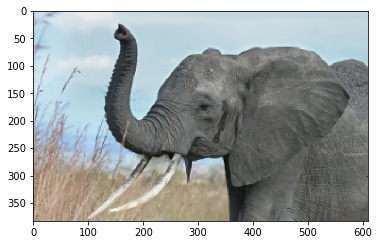

In [506]:
img = plt.imread('elephant.png')
print(img.shape, img.dtype)

plt.imshow(img)
plt.savefig('elephant_plot.png')
plt.imsave('elephant_gray.png', img[:,:,0], cmap=plt.cm.gray)
plt.show()

###### Exceptions

In [29]:
# try/except block
while True:
    try:
        x = float(input('Enter a number: '))
        break
    except ValueError:
        print('Not a valid number. Try again.')
print(x)

Enter a number: a
Not a valid number. Try again.
Enter a number: 2.1
2.1


In [30]:
# capture and reraise exception
name = input('Enter a name: ')
try:
    name = name.encode('ascii')
except UnicodeError as e:
    if name == 'João':
        print('OK, João')
    else:
        raise e
print(name)

Enter a name: João
OK, João
João


###### Classes

In [31]:
class Student(object): # base class
    status = 'student' # attribute

    def __init__(self, name, age=0, major=None):
        self.name = name
        self.age = age
        self.major = major
    def set_age(self, age): # method
        self.age = age
    def set_major(self, major):
        self.major = major
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s' \
              % (self.name,self.age,self.status,self.major))

joao = Student('João')
joao.set_age(22)
joao.set_major('Physics')
joao.get_bio()

I am João, 22 year old student. I study Physics


In [32]:
class MasterStudent(Student): # inheritance from Student class
    def __init__(self, name, age=0, major=None, thesis=None):
        # if ommited, parent __init__ is used
        Student.__init__(self, name, age, major) # initialize parent object
        self.thesis = thesis
    def set_thesis(self, thesis):
        self.thesis = thesis
    def get_bio(self):
        print('I am %s, %i year old %s. I study %s and am doing my thesis in %s' \
              % (self.name,self.age,self.status,self.major,self.thesis))

james = MasterStudent('James', 23, 'Maths', 'QuInfo')
james.get_bio()

I am James, 23 year old student. I study Maths and am doing my thesis in QuInfo


## 1.3. NumPy: numerical data

###### NumPy arrays
##### (faster than lists - easier to manipulate - only allow one data type)

In [33]:
# np.lookfor('create array') # keyword search on docstrings

In [34]:
L = range(1000)
%timeit [i**2 for i in L]

a = np.array(L)
%timeit a**2 # only faster for big arrays

266 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.49 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [181]:
a = np.array([0, 1, 2, 3, 4, 5])
b = np.array([[0, 1, 2], [3, 4, 5]])
c = np.array([[[1], [2]], [[3], [4]]])

print(a.ndim, len(a), a.shape)
print(b.ndim, len(b), b.shape)
print(c.ndim, len(c), c.shape, '\n')

a[1] = 2.8  # float truncated to int
d = a + 0.1 # a changes to floats
e = a.astype(float)
f = np.around(d, 0) # rounds to 0 decimals. Still floats!
print(a, d, e, f, '', sep='\n')

print(b[1,1], b[1][1], '\n') # same!

br = b[::-1] # reverse lines
print(b, br, sep='\n')
type(a)

1 6 (6,)
2 2 (2, 3)
3 2 (2, 2, 1) 

[0 2 2 3 4 5]
[0.1 2.1 2.1 3.1 4.1 5.1]
[0. 2. 2. 3. 4. 5.]
[0. 2. 2. 3. 4. 5.]

4 4 

[[0 1 2]
 [3 4 5]]
[[3 4 5]
 [0 1 2]]


numpy.ndarray

##### Evenly spaced

In [36]:
a = np.arange(10) # end
b = np.arange(1, 9, 2) # start, end (exclusive), step
print(b)

[1 3 5 7]


##### By number of points

In [37]:
a = np.linspace(0, 1, 6) # start, end (inclusive), num-points
b = np.linspace(0, 1, 5, endpoint=False)
print(a)

[0.  0.2 0.4 0.6 0.8 1. ]


##### Common matrices

In [38]:
a = np.ones((3, 3))
b = np.zeros((2, 2))
c = np.eye(3) # 3x3 identity
d = np.diag([1, 2, 3, 4])
e = np.triu(a, 1) # zeros below 1st diagonal
f = np.tril(a, -1) # zeros above -1st diagonal

f2 = f.T # same as np.transpose(f) -> creates view!
f2[2,2] = 2 # also in f!

g = np.empty((2,3)) # does not initialize entries!
print(a, b, c, d, e, f, f2, g, sep='\n\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[0. 0.]
 [0. 0.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 2.]]

[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 2.]]

[[0.  0.2 0.4]
 [0.6 0.8 1. ]]


##### Tiles

In [224]:
a = np.array([[1, 2], [3, 4]])
b = np.tile(a, (2,3))
print(b)

[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]]


##### Random

In [222]:
np.random.seed()         # uses current time as seed
a = np.random.rand(3,2)  # uniform in [0, 1]
b = np.random.randn(2,2) # Gaussian
c = np.random.randint(1, 10, (3,2,2))
print(a, b, c, '', sep='\n\n')

np.random.shuffle(c) # random swap of 1st axis. In-place!
print(c)

[[0.015 0.672]
 [0.549 0.284]
 [0.069 0.101]]

[[0.098 0.602]
 [1.217 0.729]]

[[[9 4]
  [5 1]]

 [[8 4]
  [3 5]]

 [[4 3]
  [3 7]]]


[[[4 3]
  [3 7]]

 [[8 4]
  [3 5]]

 [[9 4]
  [5 1]]]


##### Structured type

In [180]:
a = np.zeros((4,), dtype=[('a', 'S3'), # up to 3 characters
                          ('b', int),
                          ('c', float)])
a[0] = 1
a[1][0] = 'banana'
a[1][1] = 2
a[1][2] = 2

print(a)
a.dtype

[(b'1', 1, 1.) (b'ban', 2, 2.) (b'', 0, 0.) (b'', 0, 0.)]


dtype([('a', 'S3'), ('b', '<i8'), ('c', '<f8')])

##### Copies /  Views

In [41]:
a = np.arange(10)
b = a[::2] # creates a "view" -> way of accessing data (only in numpy!)
c = a[::2].copy() # creates different object

a[0] = 12
print(np.may_share_memory(a, b), \
      np.may_share_memory(a, c))
print(a, b, c, sep='\n')

True False
[12  1  2  3  4  5  6  7  8  9]
[12  2  4  6  8]
[0 2 4 6 8]


##### Comparisons

In [42]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
d = np.array([1, 2.1, 3, 4.15])

# element-wise
print(a == b)

# array-wise
print(np.array_equal(a, b), np.array_equal(a, c))
print(np.allclose(a, d, rtol=0.02, atol=0.08)) # elements equal within tolerance
# a[i]-d[i] == atol+rtol*d[i]

# logical
a = np.array([1, 1, 0, 0])
b = np.array([1, 0, 1, 0])
print(np.logical_or(a, b), np.logical_and(a, b), sep='\n')
print(np.all(a), a.all()) # same!
print(np.any(a), a.any()) # same!

[False  True False  True]
False True
True
[ True  True  True False]
[ True False False False]
False False
True True


##### Masks

In [229]:
a = np.random.randint(0, 21, 15)
mask = (a % 3 == 0) # boolean mask (element-wise comparison)

b = a[mask]
print(mask, a, b, sep='\n')

a[mask] = -1
print(a)

[ True False False  True  True  True False False False False False False
 False  True False]
[ 9  4 10  3 18  6  5  7 14  7 10  2  5  3  2]
[ 9  3 18  6  3]
[-1  4 10 -1 -1 -1  5  7 14  7 10  2  5 -1  2]


In [44]:
a = np.arange(0, 100, 10)

mask = np.array([[2, 3, 2], [4, 2, 5]]) # int mask -> can have any shape if np.array
b = a[mask]
print(a, b, sep='\n')

mask2 = [9, 5, 7, 1] # list mask can only be 1D
a[mask2] = -1
print(a)

[ 0 10 20 30 40 50 60 70 80 90]
[[20 30 20]
 [40 20 50]]
[ 0 -1 20 30 40 -1 60 -1 80 -1]


In [265]:
a = np.arange(4)
b = np.ma.array(a, mask=[0, 1, 1, 0]) # view!
c = np.ma.array(a, mask=[0, 0, 1, 1])

b[2] = 9 # clears entry mask
b[3] = np.ma.masked # masks entry
b.filled(-1) # fill masked entries
print(a, b, c, b + c, sep='\n')
c.mask = np.ma.nomask # removes mask
print(c, '\n')

print(b.data, b.mask, b.mean(), '', sep='\n') # not all methods respect masks!

d = np.ma.sqrt([1, 0, -1, 2]) # masks invalid results
e = np.ma.log([1, 0, -1, 2])
print(d, e, sep='\n')

[0 1 9 3]
[0 -- 9 --]
[0 1 -- --]
[0 -- -- --]
[0 1 9 3] 

[0 1 9 3]
[False  True False  True]
4.5

[1.0 0.0 -- 1.4142135623730951]
[0.0 -- -- 0.6931471805599453]


##### Element-wise operations

In [45]:
a = np.arange(5) 
a += 1
b = 2**a
c = a*b
print(a, b, c, '', sep='\n')

print(np.sin(a), np.log(a), np.exp(a), '', sep='\n')

a[2:] = 9 # assigns to all elements
print(a)

[1 2 3 4 5]
[ 2  4  8 16 32]
[  2   8  24  64 160]

[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
[0.         0.69314718 1.09861229 1.38629436 1.60943791]
[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]

[1 2 9 9 9]


##### Sums & other operations

In [46]:
a = np.array([[1, 2, 3, 8], [5, 6, 7, 8]])
b = np.arange(4)

print(np.sum(a), a.sum()) # same!
print(a.sum(0)) # sum each column
print(a.sum(1)) # sum each row
print(np.cumsum(a))
print(a.dot(b)) # matrix multiplication (dot product)
print()

print(a.mean(), np.median(a), a.std())
print(np.mean(a, -1)) # last axis

40 40
[ 6  8 10 16]
[14 26]
[ 1  3  6 14 19 25 32 40]
[32 44]

5.0 5.5 2.5495097567963922
[3.5 6.5]


##### Extrema

In [47]:
a = np.array([[1, 2, 3, 8], [5, 6, 7, 8]])
print(a.min(), a.max())
print(a.argmin(), a.argmax()) # extrema's flattened index (only 1st extrema)
print(a.max(0), a.argmax(0)) # columns' extrema
print(a.max(1), a.argmax(1)) # rows' extrema

1 8
0 3
[5 6 7 8] [1 1 1 0]
[8 8] [3 3]


##### Shape manipulation

In [48]:
# reshape returns view/copy "randomly"
a = np.arange(6).reshape((2, -1)) # size -1 is inferred
b = a.flatten() # Copy!
print(a, b, a.ravel(), a.T.ravel(), '', sep='\n\n') # last dim ravels “first”. View!

c = a.transpose(1, 0) # swaps dim. View!
print(a.shape, c.shape)
print(a[1, 2], c[2, 1])

[[0 1 2]
 [3 4 5]]

[0 1 2 3 4 5]

[0 1 2 3 4 5]

[0 3 1 4 2 5]


(2, 3) (3, 2)
5 5


In [49]:
a = np.arange(4)
print(a[np.newaxis, :]) # add a dim (row vector)
print(a[:, np.newaxis], '\n') # add a dim (column vector)

print(np.resize(a, (2, 8)), '\n') # repeats array
a.resize((2, 8)) # pads with 0. In-place!
print(a)

[[0 1 2 3]]
[[0]
 [1]
 [2]
 [3]] 

[[0 1 2 3 0 1 2 3]
 [0 1 2 3 0 1 2 3]] 

[[0 1 2 3 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


##### Broadcasts
##### (operations on arrays of different sizes - possible if they share 1 dim)

In [50]:
a = np.tile(np.arange(4), (3, 1)).T 
b = np.arange(3)
c = np.arange(4)
d = c[:, np.newaxis]

print(a + b, '\n') # 4x3 + 1x3
print(a + d, '\n') # 4x3 + 4x1
print(d + b, '\n') # 4x1 + 3x1
print(c + d)       # 1x4 + 4x1

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]] 

[[0 0 0]
 [2 2 2]
 [4 4 4]
 [6 6 6]] 

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]] 

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


In [51]:
a, b = np.ogrid[0:3,0:5] # vectors with 2 dim!
print(a, b, a+b, '', sep='\n\n')

a, b = np.mgrid[0:3, 0:5] # matrices for when broadcasting not possible
print(a, b, a+b, sep='\n\n')

[[0]
 [1]
 [2]]

[[0 1 2 3 4]]

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


##### Sorts

In [52]:
a = np.array([[4, 3, 5], [1, 2, 1]])

print(np.sort(a, None), '\n') # flatten before sort
print(np.sort(a, 0), np.sort(a, 1), '', sep='\n\n')
a.sort(1) # in-place sort
print(a, '\n')

c = np.array([4, 3, 1, 2])
j = np.argsort(c) # sorted indexes -> mask!
print(c[j])

[1 1 2 3 4 5] 

[[1 2 1]
 [4 3 5]]

[[3 4 5]
 [1 1 2]]


[[3 4 5]
 [1 1 2]] 

[1 2 3 4]


###### 1D Polinomials

In [395]:
p = np.poly1d([3, 2, -1]) # coeffs in decreasing powers
print(p, '\n')
print(p(0), p.order, p.coef, p.roots, '\n\n')

p2 = np.polynomial.Polynomial([-1, 2, 3]) # coeffs in increasing powers
print(p2, '\n')
print(p2(0), p2.degree(), p2.coef, p2.roots(), '\n\n')

p3 = np.poly1d([-1, 2], True) # roots
print(p3, '\n')
print(p3.order, p3.coef, p3.roots)

   2
3 x + 2 x - 1 

-1 2 [ 3  2 -1] [-1.     0.333] 


poly([-1.  2.  3.]) 

-1.0 2 [-1.  2.  3.] [-1.     0.333] 


   2
1 x - 1 x - 2 

2 [ 1. -1. -2.] [ 2. -1.]


In [358]:
p = np.poly1d([3, 2, -1])
p2 = p*p + p
print(p2.coef)

p3, remainder = (p**2 + 4) / p
print(p3.coef, remainder.coef)

print(np.square(p)) # squares individual coeffs

[ 9 12  1 -2  0]
[ 3.  2. -1.] [4.]
[9 4 1]


###### Fits

        3          2
0.2466 x - 0.6898 x - 0.03196 x + 1.16 

[ 0.247 -0.69  -0.032  1.16 ] 

cheb([ 0.96  -0.242 -0.046  0.014 -0.018  0.023])


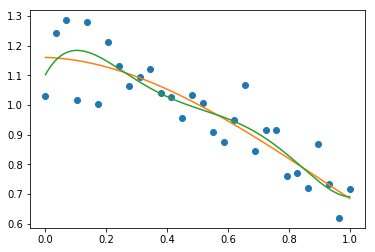

In [447]:
x = np.linspace(0, 1, 30)
y = np.cos(x) + 0.3*np.random.rand(30)

fit = np.polyfit(x, y, 3) # 3rd degree
p = np.poly1d(fit) # coeffs array
t = np.linspace(0, 1, 200)
print(p, '\n')
print(fit, '\n')

p2 = np.polynomial.Chebyshev.fit(x, y, 5) # Chebyshev basis
print(p2)

plt.plot(x, y, 'o')
plt.plot(t, p(t))
plt.plot(t, p2(t))
plt.show()

## 1.4. Matplotlib: plotting

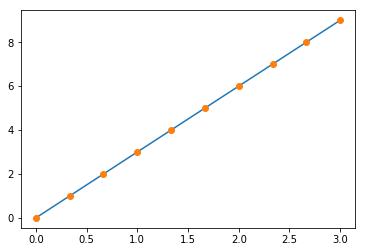

In [53]:
x = np.linspace(0, 3, 10)
y = np.linspace(0, 9, 10)
plt.plot(x, y) # line
plt.plot(x, y, 'o') # dots
plt.show() # not needed with inline magic

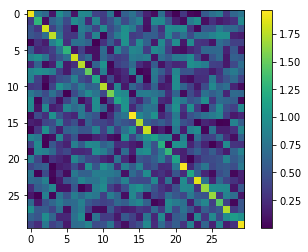

In [54]:
image = np.eye(30) + np.random.rand(30, 30)
plt.imshow(image) # colors: cmap=plt.cm.***
plt.colorbar()
plt.show()

## 2.7. Optimization: finding minima

In [55]:
from scipy import optimize

###### 1D

     fun: -1.0
    nfev: 13
     nit: 9
 success: True
       x: 0.6999999997839409 

     fun: -1.0
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.7 

True True
0.6999999997839409 0.7
-2.160590595323697e-10 0.0


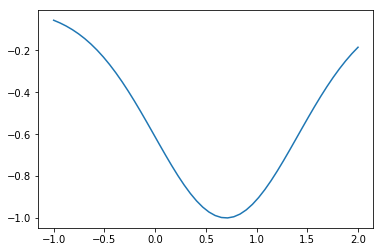

In [280]:
func = lambda x: -np.exp(-(x - 0.7)**2)
result = optimize.minimize_scalar(func)
result2 = optimize.minimize_scalar(func, bounds=(0.6, 0.8), method='bounded')
print(result, '\n')
print(result2, '\n')

print(result.success, result2.success) # check if solver was successful
print(result.x, result2.x)
print(result.x - 0.7, result2.x - 0.7) # error

x = np.linspace(-1, 2)
plt.plot(x,func(x))
plt.show()